<center><h1> 性别识别：逻辑回归</h1></center>

## 案例代码 

In [76]:
import pandas as pd   #导入库
MasterFile=pd.read_csv('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/FaceScore.csv')
#读入参考文件 
print(MasterFile.shape)  #打印数组维度
MasterFile.head()        #打印前五个

(24, 2)


,Filename,Rating
0,ftw (1).jpg,4.083333
1,mtw (2).jpg,3.666667
2,mtw (3).jpg,1.916667
3,mtw (4).jpg,2.416667
4,mtw (5).jpg,3.166667


### 准备X数据

In [77]:
import numpy as np
from PIL import Image  

FileNames=MasterFile['Filename']
N=len(FileNames)
IMSIZE=128                #设置随机种子
X=np.zeros([N,IMSIZE,IMSIZE,3])  #返回一个和文件图片一致的用0填充的矩阵
for i in range(N):      #循环导入文件
    MyFile=FileNames[i]  
    Im=Image.open('F:/大三（上）/深度学习/TASK2.1：AI可以为颜值打分/image/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])  #图像的缩放
    Im=np.array(Im)/255     
    X[i,]=Im 

### 准备Y数据

In [78]:
Y=np.zeros([N,2])
for i in range(N):
    gender=FileNames[i][0]
    if gender=='m':
        Y[i,0]=1
    else:
        Y[i,1]=1 

### 切分：Training+Validation

In [79]:
from sklearn.model_selection import train_test_split   #构造训练集和测试集
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.5,random_state=0)

### 数据展示

<Figure size 432x288 with 0 Axes>

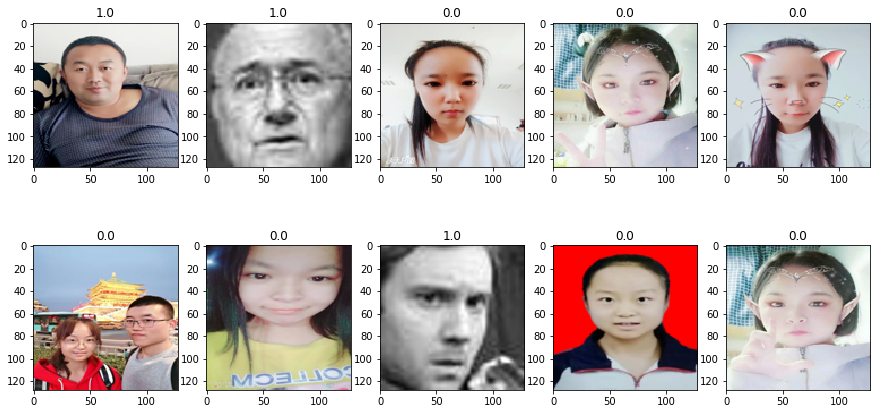

In [80]:
plt.figure()                     #导入绘图库
fig,ax=plt.subplots(2,5)        #2行5列
fig.set_figheight(7.5)           
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(10):             #展示10张照片的性别
    ax[i].imshow(X0[i,:,:,:])
    ax[i].set_title(Y0[i,0])

###  逻辑回归：模型设计

In [81]:
from keras.layers import Dense, Flatten, Input      #导入keras模型库
from keras.layers import BatchNormalization, Conv2D,MaxPooling2D
from keras import Model

input_layer=Input([IMSIZE,IMSIZE,3])  #输入数组矩阵
x=input_layer
#x=BatchNormalization()(x)
#x=Conv2D(10,[2,2],activation='relu')(x)
#x=MaxPooling2D([16,16])(x)
x=Flatten()(x)                #返回一维数组
x=Dense(2,activation='softmax')(x)  #激活神经元
output_layer=x                     #输出性别
model=Model(input_layer,output_layer)   #建立模型
model.summary()                 #描述模型统计变量

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 98306     
Total params: 98,306
Trainable params: 98,306
Non-trainable params: 0
_________________________________________________________________


输入层为长度为128x128x3的矩阵，消耗了49152个参数，乘以2，再加上截距项，一共消耗了98306个参数.

In [82]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#极大似然估计；设置学习速率为0.01；计算精度。

### 逻辑回归：建立模型

In [83]:
model.fit(X0,Y0,             #模型实现
          validation_data=[X1,Y1],  
          batch_size=500,   
          epochs=100)      

Epoch 1/100
1/1 [==============================] - 0s 67ms/step - loss: 0.5296 - accuracy: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 118.6905 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 64.5663 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 3.9412 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 43.1873 - accuracy: 0.3333 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 1.3010 - accuracy: 0.9167 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 33.0379 - accuracy: 0.7500 - val_los

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 56/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 57/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy:

### 模型预测：性别识别 

array([[0., 1.]], dtype=float32)

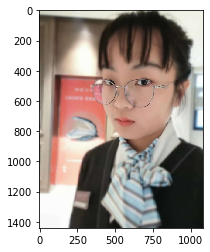

In [84]:
MyPic=Image.open('F:/图片/刘嘉玲/一张严肃的照片.jpg')   #导入测试照片
plt.imshow(MyPic)                                  #打印该照片
MyPic=MyPic.resize((IMSIZE,IMSIZE))                   #图片缩放
MyPic=np.array(MyPic)/255                           #构建数组
MyPic=MyPic.reshape((1,IMSIZE,IMSIZE,3))            # 改变数组的形状          
model.predict(MyPic)  

这里看预测识别还是准确的，精准度为1。

## 自己编写的模型

In [31]:
import os
filePath = 'F:/大三（上）/机器学习/3.实践作业/3.实践作业/二分类图'
items = os.listdir(filePath)

In [32]:
#为了避免有不是jpg格式的文件，有临时文件时可能会有问题，多做一步
namelist=[]
for name in items:
    if name.endswith(".jpg"):
        namelist.append(name)

In [33]:
len(namelist)

350

In [34]:
namelist[0] #355表示图片编号，后面的35表示人的类别

'0_male.jpg'

In [35]:
#需要将类别（输出）拆解出来
namelist[0][:-4].split("_")

['0', 'male']

### 读取图片，将图片作为特征X，将人的类别作为输出Y 

In [36]:
from PIL import Image
import numpy as np
X=np.empty((0,4096))
n_pixels=64
for i in namelist:
    img=np.array(Image.open('F:/大三（上）/机器学习/4.实践作业/4.2实践作业/二分类图/'+i).convert('L'), 'f')
    img_new=img.reshape(1,4096)
    X=np.vstack((X,img_new)) 

In [37]:
X.shape 

(350, 4096)

In [38]:
X[:5]

array([[ 77.,  91., 104., ...,  25.,  15.,  30.],
       [ 68.,  39.,  43., ...,   0.,  13.,   0.],
       [ 25.,  47., 192., ...,  12.,  54.,  39.],
       [ 75.,  11.,  58., ...,   7.,  64.,  25.],
       [ 10., 165., 246., ...,   4.,   0.,   1.]])

In [39]:
y=[]
for i in namelist:
    people=i[:-4].split("_")[1]
    y.append(people) 

In [40]:
y=np.array(y)
y

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
      

### 划分训练集和测试集 

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [42]:
X_train.shape

(346, 4096)

In [43]:
X_test.shape

(4, 4096)

### 构建KNN模型

In [50]:
#训练模型
from sklearn import neighbors
from sklearn import metrics 

KNN_model = neighbors.KNeighborsClassifier(n_neighbors =4, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [51]:
#在测试集上验证
y_predict=KNN_model.predict(X_test) #输出分类结果

In [52]:
y_predict_prob=KNN_model.predict_proba(X_test)
y_predict_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [56]:
y_predict

array(['male', 'male', 'male', 'male'], dtype='<U6')

In [57]:
y_test

array(['male', 'male', 'male', 'male'], dtype='<U6')

从上面预测结果来看，预测非常准确